## Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
df_train= pd.read_csv("C:\\Users\\hp\\Downloads\\linear reg\\train.csv")

In [3]:
df_test = pd.read_csv("C:\\Users\\hp\\Downloads\\linear reg\\test.csv")

The data set contains the information of varioous mobile phones prices based on different features.

***In this notebook-***
- The study will lead us to find out some relation between features of mobiles phones (eg- RAM, Internal memory, Dual sim etc) and its selling price
- We will compare 2 Machine Learning models i.e. (Logistic Regression and Linear Regression) and predict the accuracy of both the models.




In this problem we do not have to predict actual price but a price range i.e.(0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost)) indicating how high the price is.

***USE***

- This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
- It will be usefull for Consumers to verify that they are paying best price for a mobile.

## Data exploration and cleaning

***Checking the data by using head() function***


In [4]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


***Quick view on some statical details***

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


***Getting columns names***

In [6]:
df_train.columns
#df_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### In this data:

battery_power:Total energy a battery can store in one time measured in mAh

blue:Has bluetooth or not

clock_speed:speed at which microprocessor executes instructions

dual_sim:Has dual sim support or not

fc:Front Camera mega pixels

four_g:Has 4G or not

int_memory:Internal Memory in Gigabytes

m_dep:Mobile Depth in cm

mobile_wt:Weight of mobile phone

n_cores:Number of cores of processor

pc:Primary Camera mega pixels


px_height:Pixel Resolution Height

px_width:Pixel Resolution Width

ram:Random Access Memory in Megabytes

sc_h:Screen Height of mobile in cm

sc_w:Screen Width of mobile in cm

talk_time:longest time that a single battery charge will last when you are

three_g:Has 3G or not

touch_screen:Has touch screen or not

wifi:Has wifi or not

price_range: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost)


***Check the shape of data***

In [7]:
df_train.shape
#df_test.shape   (had same number of columns (21) and 1000 rows)

(2000, 21)

***Getting information of data***

In [8]:
df_train.info()
#df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

***Are there any null values***

In [9]:
df_train.isnull().sum()
#df_test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Luckly both the data's didn't contain any of the null values.

***Check to any duplicate rows present in data***

In [10]:
df_train.duplicated(keep=False).any()

False

## Data visualization

### Pie chart

***Mobiles supports 3G***

In [11]:
labels= ['Supported 3G', ' Not-Supported']
values=df_train['three_g'].value_counts().values

<function matplotlib.pyplot.show(*args, **kw)>

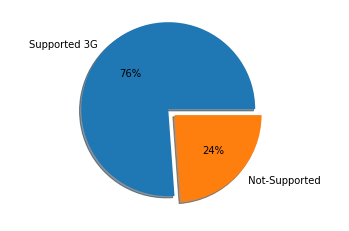

In [12]:
plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

76% mobile supports 3G network

***Mobiles supports 4G***

In [13]:
labels= ['Supported 4G', ' Not-Supported']
values=df_train['four_g'].value_counts().values

<function matplotlib.pyplot.show(*args, **kw)>

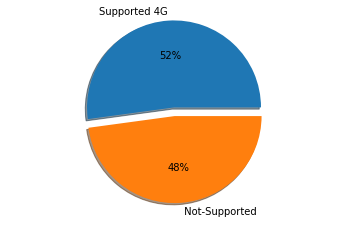

In [14]:
plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

Only 52% mobiles supports 4G

### Bar graph visualization

***Dual sim slot***

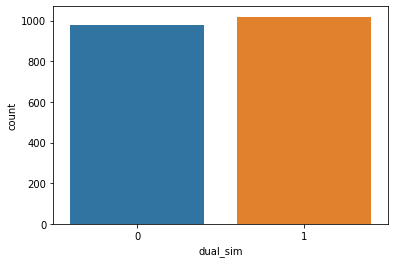

In [15]:
sns.countplot(df_train['dual_sim'])

Dual sim mobiles are slightly more than the single sim


***Front camera***

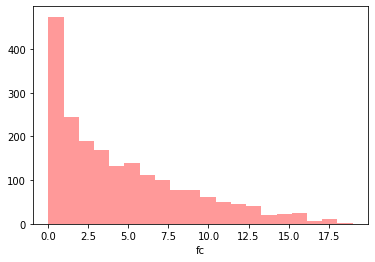

In [16]:
sns.distplot(df_train['fc'], color='red', kde=False)

Majority of mobiles having front camera megapixcel in between 3 to 7

***Battery power***

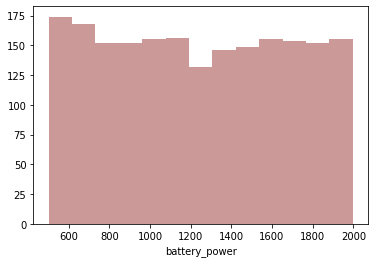

In [17]:
sns.distplot(df_train['battery_power'],color='maroon', kde=False)

Low power batteries are slightly more in count

***Weight of mobile***

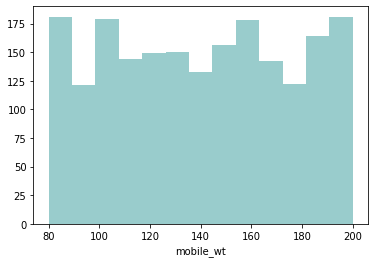

In [18]:
sns.distplot(df_train['mobile_wt'],color='teal', kde=False)

weight of mobiles spread almost evenly in data

***Screen width of mobile***

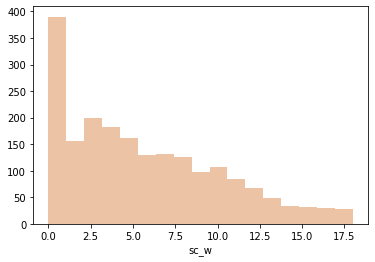

In [19]:
sns.distplot(df_train['sc_w'],color='chocolate', kde=False)

Width of mobiles are mailnly in range of 3 to 7

### Correlation with heatmap

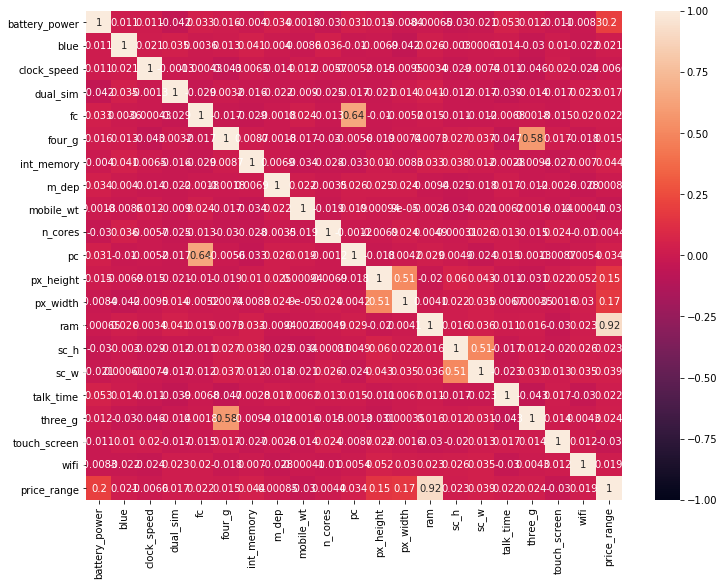

In [20]:
plt.figure(figsize=(12, 9))
corr=df_train.corr()
sns.heatmap(corr[(corr<=0.5) | (corr>=-0.5)],vmin=-1, vmax=1, annot=True)

Some of the features are surely correlated with each other

### Box plot for price range

***Dual sim VS Price range***

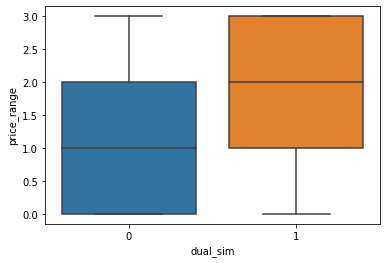

In [21]:
sns.boxplot(df_train['dual_sim'],df_train['price_range'])

Price range of dual sim mobiles are definately more than single sim

***4G VS Price range***

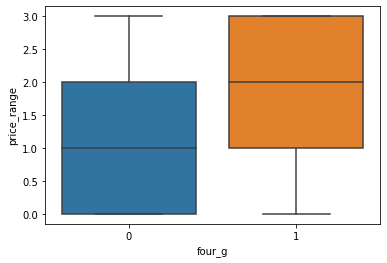

In [22]:
sns.boxplot(df_train['four_g'],df_train['price_range'])

Price of 4G mobiles are considerably higher than non 4G mbiles

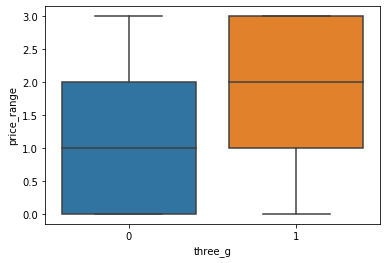

In [23]:
sns.boxplot(df_train['three_g'],df_train['price_range'])

Price of 3G mobiles are considerably higher than non 3G mbiles

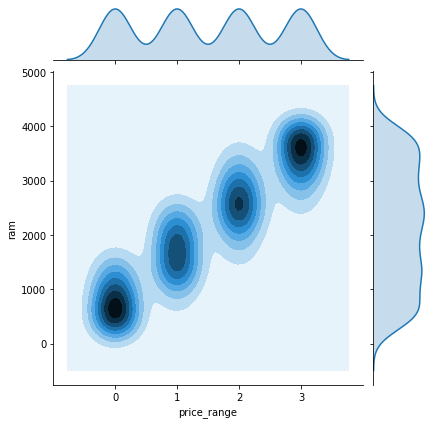

In [24]:
sns.jointplot(x='price_range', y='ram', data=df_train, kind='kde')

Price gets effected as the size of ram increases

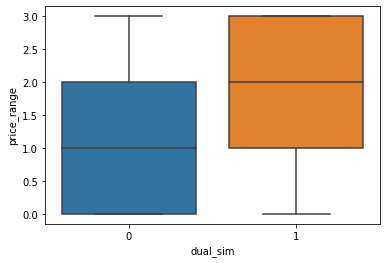

In [25]:
sns.boxplot(df_train['dual_sim'],df_train['price_range'])

Price range of dual sim mobiles are greater than single sim

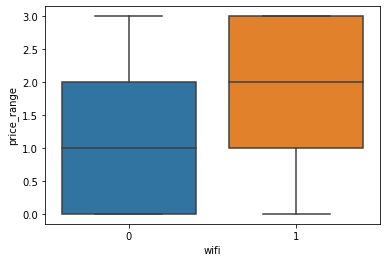

In [26]:
sns.boxplot(df_train['wifi'],df_train['price_range'])

mobiles having wifi have more price range

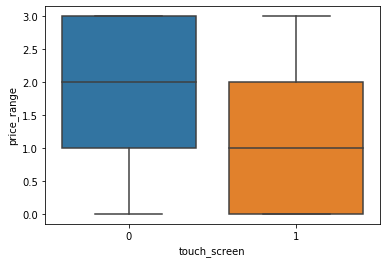

In [27]:
sns.boxplot(df_train['touch_screen'],df_train['price_range'])

Price Range of touch screen mobiles are low. Quite strange considering all the 4G,3G and Wifi phones are in higher price range

## Test and Train split

In [28]:
#Since all the features are in different range, preprocessing scalar is applied
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = df_train.drop('price_range',axis=1)
y = df_train['price_range']

scaler.fit(X)
X_transformed = scaler.transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3, random_state=31)

## Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X_transformed,y,test_size=0.3, random_state=2)

In [30]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

***Accuracy of Model***

In [31]:
model.score(X_test,y_test)

0.9583333333333334

***Logistic Regression model perform a good accuracy of 95%***

## Confusion matrix
***Checking where the logestic regression model fails***

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
y_pred= model.predict(X_test)

In [34]:
cm= confusion_matrix(y_test,y_pred)

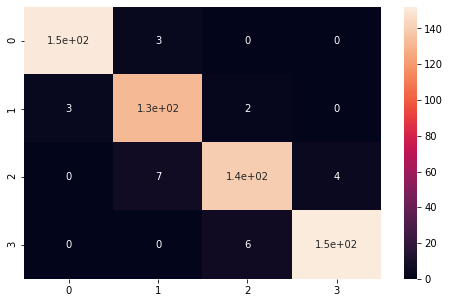

In [35]:
plt.figure(figsize= (8,5))
sns.heatmap(cm, annot=True)
plt.xlabel= 'predict'
plt.ylabel='truth'

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Accuracy of Model***

In [37]:
lr.score(X_test,y_test)

0.9153796136870499

***Linear regression model has a accuracy of 91% which is also good but lower than logistic regression***

## Using Cross_val_score

In [44]:
from sklearn.model_selection import cross_val_score

In [54]:
logr=cross_val_score(LogisticRegression(),X_transformed,y, cv=10)

In [57]:
linr=cross_val_score(LinearRegression(),X_transformed,y, cv=10)

In [59]:
logr

array([0.955, 0.98 , 0.95 , 0.96 , 0.975, 0.95 , 0.965, 0.955, 0.97 ,
       0.96 ])

In [56]:
logr.mean()

0.9620000000000001

In [60]:
linr

array([0.91723625, 0.91675416, 0.90752382, 0.9166765 , 0.92560659,
       0.91769741, 0.91741523, 0.91516622, 0.90633669, 0.92331252])

In [58]:
linr.mean()

0.9163725383885849